In [1]:
# Mobile Price Prediction


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dataset import
dataset = pd.read_csv('d:/data/train.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [3]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
X.shape

(2000, 20)

In [5]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

Now there is one unique binary value for the class. The new array formed will be of shape (n, number of classes), where n is the number of samples in our dataset. We can do this using simple function by sklearn:

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
#y = ohe.fit_transform(y)

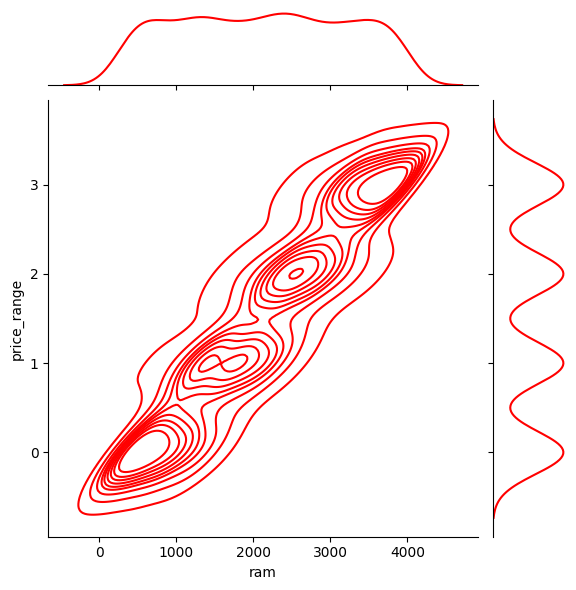

In [7]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

In [8]:
# Our dataset has 4 classes so our new label array
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [9]:
y.shape

(2000, 4)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

### Building Neural Network

In [19]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network design
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Example

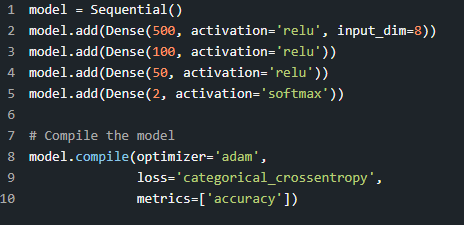

### Training model

In [21]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
36/36 [==============================] - 0s 921us/step - loss: 1.5527 - accuracy: 0.2533
Epoch 2/100
36/36 [==============================] - 0s 810us/step - loss: 1.4154 - accuracy: 0.2928
Epoch 3/100
36/36 [==============================] - 0s 862us/step - loss: 1.3562 - accuracy: 0.3389
Epoch 4/100
36/36 [==============================] - 0s 918us/step - loss: 1.3028 - accuracy: 0.3856
Epoch 5/100
36/36 [==============================] - 0s 829us/step - loss: 1.2416 - accuracy: 0.4261
Epoch 6/100
36/36 [==============================] - 0s 911us/step - loss: 1.1683 - accuracy: 0.4861
Epoch 7/100
36/36 [==============================] - 0s 906us/step - loss: 1.0811 - accuracy: 0.5417
Epoch 8/100
36/36 [==============================] - 0s 919us/step - loss: 0.9847 - accuracy: 0.6050
Epoch 9/100
36/36 [==============================] - 0s 934us/step - loss: 0.8841 - accuracy: 0.6500
Epoch 10/100
36/36 [==============================] - 0s 857us/step - loss: 0.7877 - accura

36/36 [==============================] - 0s 841us/step - loss: 0.0420 - accuracy: 0.9939
Epoch 82/100
36/36 [==============================] - 0s 826us/step - loss: 0.0416 - accuracy: 0.9939
Epoch 83/100
36/36 [==============================] - 0s 848us/step - loss: 0.0408 - accuracy: 0.9944
Epoch 84/100
36/36 [==============================] - 0s 818us/step - loss: 0.0398 - accuracy: 0.9956
Epoch 85/100
36/36 [==============================] - 0s 792us/step - loss: 0.0390 - accuracy: 0.9939
Epoch 86/100
36/36 [==============================] - 0s 879us/step - loss: 0.0381 - accuracy: 0.9944
Epoch 87/100
36/36 [==============================] - 0s 846us/step - loss: 0.0373 - accuracy: 0.9961
Epoch 88/100
36/36 [==============================] - 0s 857us/step - loss: 0.0360 - accuracy: 0.9961
Epoch 89/100
36/36 [==============================] - 0s 792us/step - loss: 0.0360 - accuracy: 0.9967
Epoch 90/100
36/36 [==============================] - 0s 771us/step - loss: 0.0353 - accuracy: 

In [22]:
# Now we can check the model's performance on test data:

y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

# This step is inverse one hot encoding process. 
# We will get integer labels using this step. We can predict on test data using a simple method of keras, 
# model.predict(). It will take the test data as input and will return the prediction outputs as softmax.

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

7/7 [==============================] - 0s 1ms/step
Accuracy is: 91.5


In [23]:
# We can use test data as validation data and can check the accuracies after every epoch. 
# This will give us an insight into overfitting at the time of training only and we can take steps 
# before the completion of all epochs. We can do this by changing fit function as:

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=10, batch_size=64)

# Now the training step output will also contain validation accuracy

Epoch 1/10
29/29 [==============================] - 0s 5ms/step - loss: 0.0275 - accuracy: 0.9983 - val_loss: 0.1664 - val_accuracy: 0.9150
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9989 - val_loss: 0.1714 - val_accuracy: 0.9150
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9989 - val_loss: 0.1696 - val_accuracy: 0.9200
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9989 - val_loss: 0.1656 - val_accuracy: 0.9200
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9978 - val_loss: 0.1742 - val_accuracy: 0.9200
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9989 - val_loss: 0.1738 - val_accuracy: 0.9200
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.9989 - val_loss: 0.1796 - val_accuracy: 0.9200
Epoch 8/10
29/29 [==

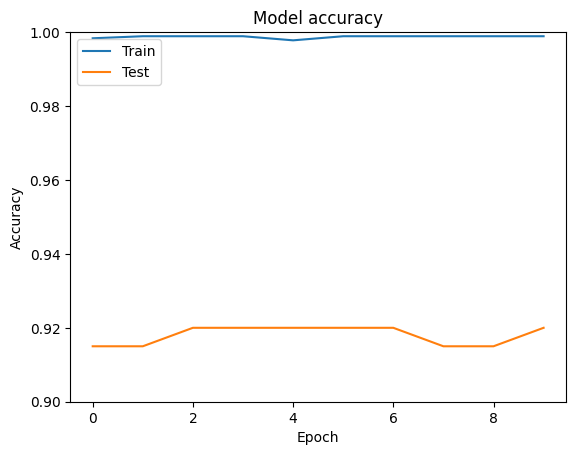

In [24]:
# Our model is working fine. Now we will visualize training and validation losses and accuracies.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0.9, 1)
plt.show()

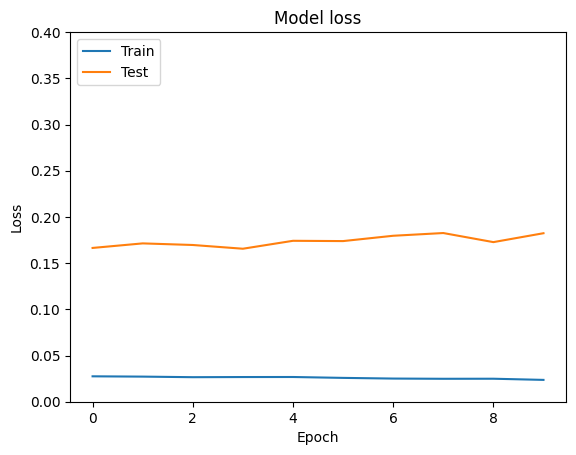

In [25]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.ylim(0, 0.4)
plt.show()